<a href="https://colab.research.google.com/github/vaishnavirk0411/Sparks_Foundation_Modules/blob/main/Task1_Prediction_using_Supervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Author :** **Vaishnavi Kulkarni**

# **Task 1 : Prediction using Supervised Machine Learning**

***GRIP @ The Sparks Foundation***

In this regression task I tried to predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

This is a simple linear regression task as it involves just two variables.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
student_data = pd.read_csv("http://bit.ly/w-data")
student_data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# **The relation between Independent and Target Variable**

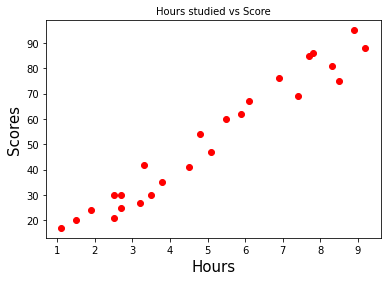

In [5]:
plt.xlabel('Hours',fontsize=15)
plt.ylabel('Scores',fontsize=15)
plt.title('Hours studied vs Score', fontsize=10)
plt.scatter(student_data.Hours,student_data.Scores,color='red')
plt.show()

**Observation:** 
**Number of Hours studied is linearly related to the Scores of the student.**

# **# Preparing Data and splitting into train and test sets.**

In [6]:
X = student_data.iloc[:,:-1].values
Y = student_data.iloc[:,1].values

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 0,test_size=0.2)


In [8]:
print("X train.shape =", X_train.shape)
print("Y train.shape =", Y_train.shape)
print("X test.shape  =", X_test.shape)
print("Y test.shape  =", Y_test.shape)

X train.shape = (20, 1)
Y train.shape = (20,)
X test.shape  = (5, 1)
Y test.shape  = (5,)


# **Training the Linear Regression Model.**

In [9]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()

In [10]:
##Fitting Training Data
linreg.fit(X_train,Y_train)
print("Training our algorithm is finished")

Training our algorithm is finished


In [11]:
print("B0 =",linreg.intercept_,"\nB1 =",linreg.coef_)## B0 is Intercept & Slope of the line is B1.,"

B0 = 2.018160041434662 
B1 = [9.91065648]


**Plotting the REGRESSION LINE**

In [12]:
Y0 = linreg.intercept_ + linreg.coef_*X_train

**Plotting on training data**

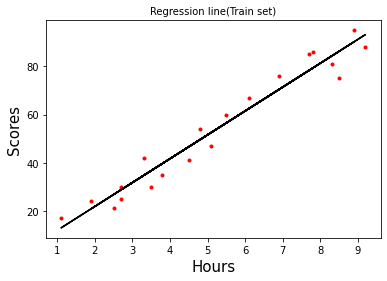

In [13]:
plt.scatter(X_train,Y_train,color='red',marker='.')
plt.plot(X_train,Y0,color='black')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line(Train set)",fontsize=10)
plt.show()

# **Test Data**

In [14]:
Y_pred=linreg.predict(X_test)##predicting the Scores for test data
print(Y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [15]:
#now print the Y_test.
Y_test

array([20, 27, 69, 30, 62])

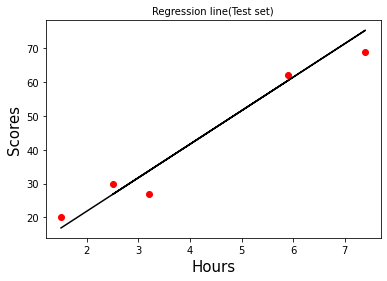

In [16]:
#plotting line on test data
plt.plot(X_test,Y_pred,color='black')
plt.scatter(X_test,Y_test,color='red')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line(Test set)",fontsize=10)
plt.show()

# **Comparing Actual vs Predicted Scores**

In [17]:
Y_test1 = list(Y_test)
prediction=list(Y_pred)
df_compare = pd.DataFrame({ 'Actual':Y_test1,'Result':prediction})
df_compare

,Actual,Result
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# **ACCURACY OF THE MODEL**

In [18]:
from sklearn import metrics
metrics.r2_score(Y_test,Y_pred)

0.9454906892105354

**Observation:Above 94% percentage indicates that it is a good model.**

# **PREDICTING THE ERROR**

In [19]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [20]:
MSE = metrics.mean_squared_error(Y_test,Y_pred)
root_E = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))
Abs_E = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))
print("Mean Squared Error      = ",MSE)
print("Root Mean Squared Error = ",root_E)
print("Mean Absolute Error     = ",Abs_E)

Mean Squared Error      =  21.598769307217456
Root Mean Squared Error =  4.647447612100373
Mean Absolute Error     =  4.647447612100373


# **CONCLUSION BY PREDICTING THE SCORE**

In [21]:
Prediction_score = linreg.predict([[9.25]])
print("predicted score for a student studying 9.25 hours :",Prediction_score)

predicted score for a student studying 9.25 hours : [93.69173249]
